## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  23.438126  1672.889448  0.971448  3.343467  1.490731
1  34.864767   911.705641  0.442806  9.864192  1.550802
2  62.611555   281.484368  0.954120  6.966516  1.333819
3   3.902336  1288.386441  0.367277  4.406430  1.522560
4  19.128557   229.847356  0.444835  3.668205  1.399664


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9788648	total: 63.2ms	remaining: 1m 3s
1:	learn: 0.9670285	total: 65.6ms	remaining: 32.7s
2:	learn: 0.9555426	total: 66.5ms	remaining: 22.1s
3:	learn: 0.9423640	total: 67.4ms	remaining: 16.8s
4:	learn: 0.9324658	total: 67.9ms	remaining: 13.5s
5:	learn: 0.9208898	total: 68.6ms	remaining: 11.4s
6:	learn: 0.9115458	total: 69.1ms	remaining: 9.8s
7:	learn: 0.9006933	total: 69.9ms	remaining: 8.67s
8:	learn: 0.8903614	total: 70.6ms	remaining: 7.78s
9:	learn: 0.8799650	total: 71.2ms	remaining: 7.05s
10:	learn: 0.8704594	total: 72ms	remaining: 6.47s
11:	learn: 0.8601708	total: 72.5ms	remaining: 5.97s
12:	learn: 0.8511804	total: 72.9ms	remaining: 5.54s
13:	learn: 0.8423794	total: 73.6ms	remaining: 5.18s
14:	learn: 0.8294174	total: 74.4ms	remaining: 4.88s
15:	learn: 0.8190158	total: 74.9ms	remaining: 4.61s
16:	learn: 0.8103236	total: 75.7ms	remaining: 4.38s
17:	learn: 0.8017993	total: 76.6ms	remaining: 4.18s
18:	learn: 0.7925666	total: 77.2ms	remaining: 3

22:	learn: 0.7559018	total: 82ms	remaining: 3.48s
23:	learn: 0.7474787	total: 82.7ms	remaining: 3.36s
24:	learn: 0.7396454	total: 83.3ms	remaining: 3.25s
25:	learn: 0.7323924	total: 83.8ms	remaining: 3.14s
26:	learn: 0.7251858	total: 84.4ms	remaining: 3.04s
27:	learn: 0.7166357	total: 85ms	remaining: 2.95s
28:	learn: 0.7070474	total: 85.7ms	remaining: 2.87s
29:	learn: 0.7007679	total: 86.3ms	remaining: 2.79s
30:	learn: 0.6941405	total: 86.7ms	remaining: 2.71s
31:	learn: 0.6870108	total: 87.4ms	remaining: 2.64s
32:	learn: 0.6795201	total: 88ms	remaining: 2.58s
33:	learn: 0.6738399	total: 88.6ms	remaining: 2.52s
34:	learn: 0.6653183	total: 89.1ms	remaining: 2.46s
35:	learn: 0.6580014	total: 89.5ms	remaining: 2.4s
36:	learn: 0.6495104	total: 90ms	remaining: 2.34s
37:	learn: 0.6424093	total: 90.5ms	remaining: 2.29s
38:	learn: 0.6343634	total: 91ms	remaining: 2.24s
39:	learn: 0.6265685	total: 91.5ms	remaining: 2.2s
40:	learn: 0.6214404	total: 91.9ms	remaining: 2.15s
41:	learn: 0.6153062	tot

203:	learn: 0.1781940	total: 162ms	remaining: 633ms
204:	learn: 0.1775019	total: 163ms	remaining: 633ms
205:	learn: 0.1767849	total: 164ms	remaining: 631ms
206:	learn: 0.1759176	total: 164ms	remaining: 628ms
207:	learn: 0.1745124	total: 164ms	remaining: 626ms
208:	learn: 0.1734759	total: 165ms	remaining: 624ms
209:	learn: 0.1725571	total: 165ms	remaining: 621ms
210:	learn: 0.1716205	total: 166ms	remaining: 619ms
211:	learn: 0.1709003	total: 166ms	remaining: 617ms
212:	learn: 0.1697046	total: 166ms	remaining: 615ms
213:	learn: 0.1686711	total: 167ms	remaining: 614ms
214:	learn: 0.1681129	total: 168ms	remaining: 612ms
215:	learn: 0.1674187	total: 168ms	remaining: 610ms
216:	learn: 0.1666173	total: 168ms	remaining: 608ms
217:	learn: 0.1659148	total: 169ms	remaining: 606ms
218:	learn: 0.1653145	total: 169ms	remaining: 604ms
219:	learn: 0.1642813	total: 170ms	remaining: 602ms
220:	learn: 0.1634650	total: 170ms	remaining: 600ms
221:	learn: 0.1626892	total: 171ms	remaining: 598ms
222:	learn: 

383:	learn: 0.0909017	total: 238ms	remaining: 381ms
384:	learn: 0.0904445	total: 238ms	remaining: 381ms
385:	learn: 0.0899968	total: 239ms	remaining: 380ms
386:	learn: 0.0895584	total: 239ms	remaining: 379ms
387:	learn: 0.0891026	total: 239ms	remaining: 378ms
388:	learn: 0.0886758	total: 240ms	remaining: 377ms
389:	learn: 0.0882579	total: 240ms	remaining: 376ms
390:	learn: 0.0880722	total: 241ms	remaining: 375ms
391:	learn: 0.0876631	total: 241ms	remaining: 374ms
392:	learn: 0.0872259	total: 241ms	remaining: 373ms
393:	learn: 0.0868276	total: 242ms	remaining: 372ms
394:	learn: 0.0864376	total: 242ms	remaining: 371ms
395:	learn: 0.0860557	total: 243ms	remaining: 370ms
396:	learn: 0.0856358	total: 243ms	remaining: 369ms
397:	learn: 0.0852641	total: 243ms	remaining: 368ms
398:	learn: 0.0848430	total: 244ms	remaining: 367ms
399:	learn: 0.0844831	total: 244ms	remaining: 366ms
400:	learn: 0.0840799	total: 245ms	remaining: 365ms
401:	learn: 0.0836751	total: 245ms	remaining: 364ms
402:	learn: 

589:	learn: 0.0457214	total: 323ms	remaining: 224ms
590:	learn: 0.0456038	total: 323ms	remaining: 224ms
591:	learn: 0.0455390	total: 324ms	remaining: 223ms
592:	learn: 0.0452957	total: 324ms	remaining: 222ms
593:	learn: 0.0452134	total: 325ms	remaining: 222ms
594:	learn: 0.0450206	total: 325ms	remaining: 221ms
595:	learn: 0.0449066	total: 325ms	remaining: 221ms
596:	learn: 0.0447771	total: 326ms	remaining: 220ms
597:	learn: 0.0445447	total: 326ms	remaining: 219ms
598:	learn: 0.0443788	total: 327ms	remaining: 219ms
599:	learn: 0.0442161	total: 327ms	remaining: 218ms
600:	learn: 0.0439998	total: 327ms	remaining: 217ms
601:	learn: 0.0438632	total: 328ms	remaining: 217ms
602:	learn: 0.0436337	total: 328ms	remaining: 216ms
603:	learn: 0.0435116	total: 328ms	remaining: 215ms
604:	learn: 0.0433693	total: 329ms	remaining: 215ms
605:	learn: 0.0431583	total: 329ms	remaining: 214ms
606:	learn: 0.0430195	total: 330ms	remaining: 213ms
607:	learn: 0.0427989	total: 330ms	remaining: 213ms
608:	learn: 

772:	learn: 0.0272766	total: 398ms	remaining: 117ms
773:	learn: 0.0272486	total: 399ms	remaining: 116ms
774:	learn: 0.0271339	total: 399ms	remaining: 116ms
775:	learn: 0.0270753	total: 400ms	remaining: 115ms
776:	learn: 0.0270176	total: 400ms	remaining: 115ms
777:	learn: 0.0269903	total: 400ms	remaining: 114ms
778:	learn: 0.0269016	total: 401ms	remaining: 114ms
779:	learn: 0.0268752	total: 401ms	remaining: 113ms
780:	learn: 0.0267633	total: 402ms	remaining: 113ms
781:	learn: 0.0267068	total: 402ms	remaining: 112ms
782:	learn: 0.0265898	total: 403ms	remaining: 112ms
783:	learn: 0.0265638	total: 403ms	remaining: 111ms
784:	learn: 0.0264492	total: 403ms	remaining: 110ms
785:	learn: 0.0262965	total: 404ms	remaining: 110ms
786:	learn: 0.0262707	total: 404ms	remaining: 109ms
787:	learn: 0.0262454	total: 404ms	remaining: 109ms
788:	learn: 0.0261383	total: 405ms	remaining: 108ms
789:	learn: 0.0260286	total: 405ms	remaining: 108ms
790:	learn: 0.0258809	total: 406ms	remaining: 107ms
791:	learn: 

982:	learn: 0.0170148	total: 483ms	remaining: 8.35ms
983:	learn: 0.0170029	total: 484ms	remaining: 7.86ms
984:	learn: 0.0169105	total: 484ms	remaining: 7.37ms
985:	learn: 0.0168917	total: 484ms	remaining: 6.88ms
986:	learn: 0.0168800	total: 485ms	remaining: 6.38ms
987:	learn: 0.0168537	total: 485ms	remaining: 5.89ms
988:	learn: 0.0167636	total: 485ms	remaining: 5.4ms
989:	learn: 0.0167379	total: 486ms	remaining: 4.91ms
990:	learn: 0.0167127	total: 486ms	remaining: 4.41ms
991:	learn: 0.0167011	total: 486ms	remaining: 3.92ms
992:	learn: 0.0166763	total: 487ms	remaining: 3.43ms
993:	learn: 0.0166519	total: 487ms	remaining: 2.94ms
994:	learn: 0.0165646	total: 487ms	remaining: 2.45ms
995:	learn: 0.0165408	total: 488ms	remaining: 1.96ms
996:	learn: 0.0165294	total: 488ms	remaining: 1.47ms
997:	learn: 0.0165060	total: 488ms	remaining: 978us
998:	learn: 0.0164830	total: 489ms	remaining: 489us
999:	learn: 0.0163982	total: 489ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.423731804300629


ABC Pre-generator MAE 0.42357061032584775


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

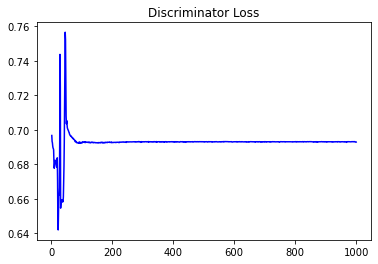

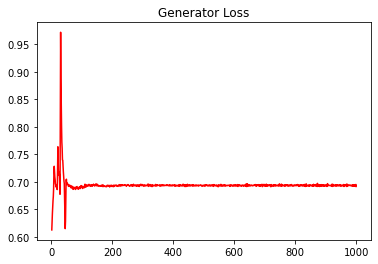

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.44721964159607885


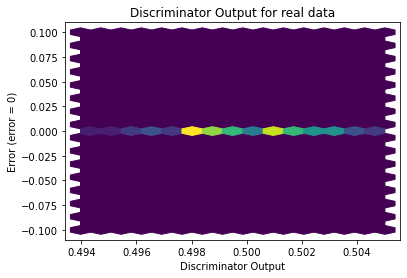

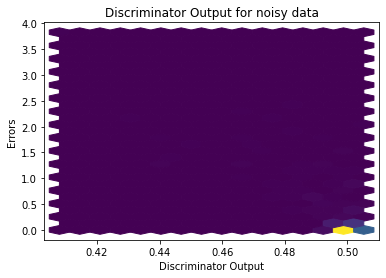

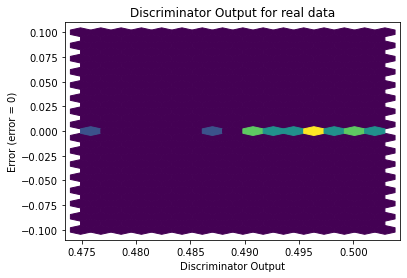

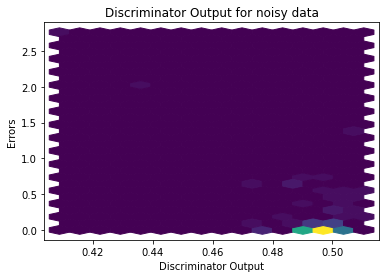

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

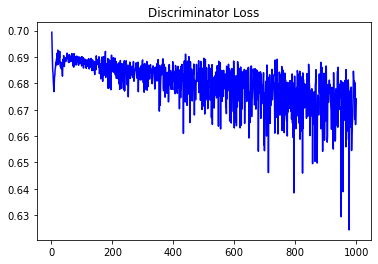

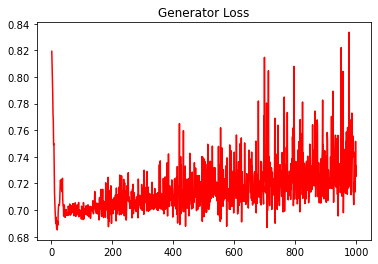

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.408730389136821


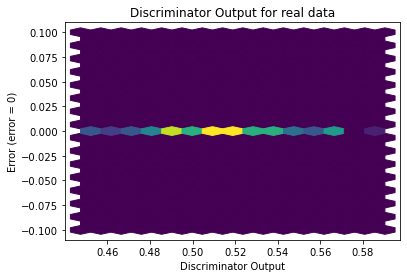

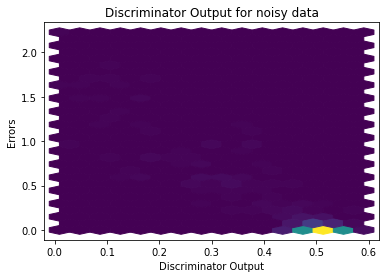

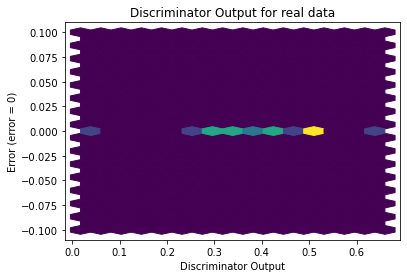

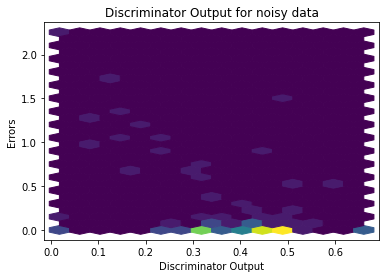

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


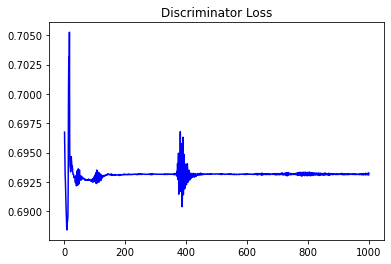

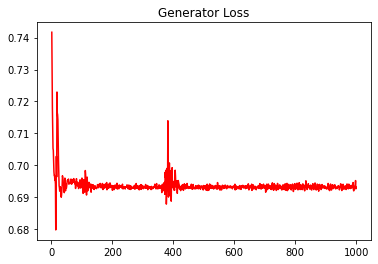

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.4115504868675489


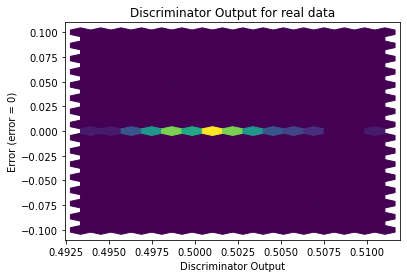

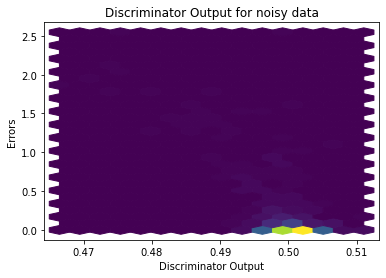

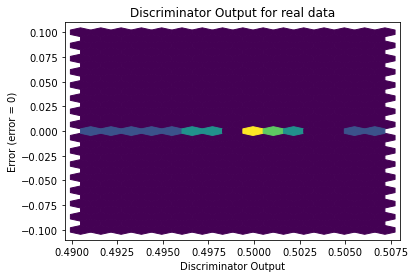

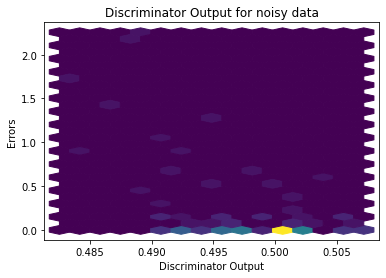

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


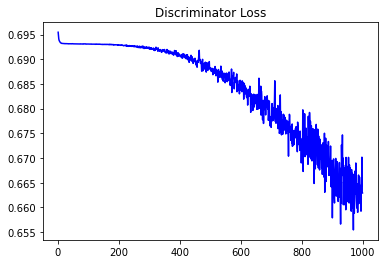

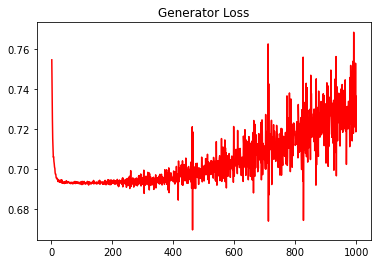

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.42344494193663196


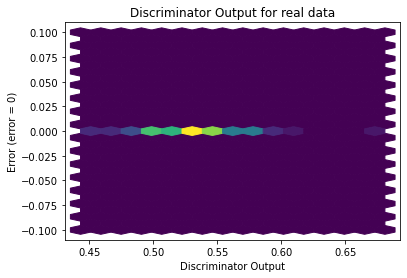

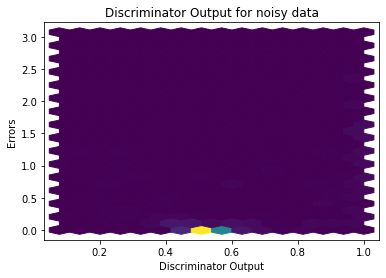

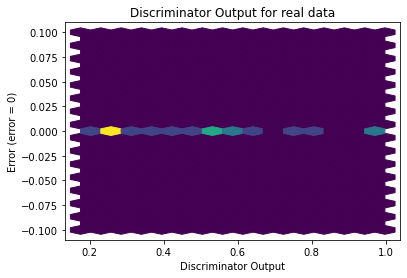

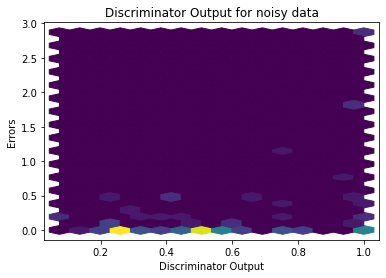

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3481]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
